In [1]:
from imdb import IMDb
ia = IMDb()

#enter the series to get ID
series_name = "Game of thrones"
series_id = ia.search_movie(series_name)[0].getID()

series = ia.get_movie(series_id)
ia.update(series,'episodes')
seasons = sorted(series['episodes'].keys())#Staffelanzahl

#get rid of negativ seasons --> unknown seasons in imdb such as specials etc
seasons = [n for n in seasons if n > 0]

In [2]:
#find incomplete seasons (seasons with episodes with no rating) and remove them from seasons
seasons_inverse = sorted(seasons,reverse=True)
incomplete_seasons = []
for season in seasons_inverse:
    for episode in range(1,len(series["episodes"][season])+1):
        try:
            rating = series["episodes"][season][episode]["rating"]
        except:
            incomplete_seasons.append(season)
            break
    
for season in incomplete_seasons:
    seasons.remove(season)

#get ratings for every episode from every complete season
ratings = []
top_rate = {
    "season":"",
    "episode":"",
    "rating":"0",
    "title":""
}
worst_rate = {
    "season":"",
    "episode":"",
    "rating":"10",
    "title":""
}
for season in seasons:
    for episode in range(1,len(series["episodes"][season])+1):
        rating = series["episodes"][season][episode]["rating"] #get("rating")
        ratings.append(rating)
        #catch highest ranked episode
        if float(rating) > float(top_rate["rating"]):
            top_rate["season"] = season
            top_rate["episode"] = episode
            top_rate["rating"] = rating
            top_rate["title"] = series["episodes"][season][episode]["title"]
        #catch lowest ranked episode    
        if float(rating) < float(worst_rate["rating"]):
            worst_rate["season"] = season
            worst_rate["episode"] = episode
            worst_rate["rating"] = rating
            worst_rate["title"] = series["episodes"][season][episode]["title"]    


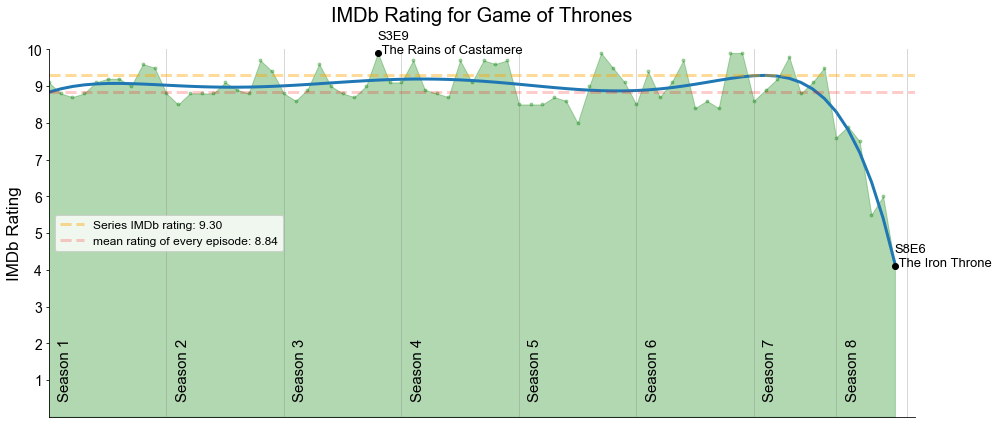

In [3]:
#generate and save plot
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean 
%matplotlib inline

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'

x_pos = np.arange(len(ratings))

fig = plt.figure(figsize=(14,6))
ax = plt.axes()

#ax.plot(np.arange(len(ratings_bb)), ratings_bb)
plt.ylim(0, 10)
plt.xlim(0,len(ratings)+len(ratings)*.01)
#plt.xlabel('Season',fontsize=17)
plt.ylabel("IMDb Rating",fontsize=17)
plt.title("IMDb Rating for %s\n"%series["title"], fontsize=20)

#add ratings to plot  
ax.plot(x_pos,ratings,  ".", color='green', alpha=0.3) 
ax.fill_between(x_pos, 0, ratings, color="green", alpha=0.3)

#add smooth line
poly = np.polyfit(x_pos,ratings,8)
poly_y = np.poly1d(poly)(x_pos)
plt.plot(x_pos,poly_y, linewidth=3)

#add season marker 
x=0
x_list=[]
for season in seasons:
    x += len(series["episodes"][season])
    x_list.append(x)
    ax.axvline(x=x, linewidth=1, color='grey',alpha=0.3)
    
#write seasons in plot
for season in seasons:
    if season == 1:
        ax.text(0.8, 0.5, 'Season %s'%season, rotation=90, fontsize=15)
    else:
        ax.text(x_list[season-2]+0.8, 0.5, 'Season %s'%season, rotation=90, fontsize=15)
        
#mark highest and lowest ranked episodes
plt.annotate(s="S%dE%d\n %s"%(top_rate["season"], top_rate["episode"], top_rate["title"]), 
             xy=(ratings.index(max(ratings)),max(ratings)),
             xytext=(ratings.index(max(ratings)),max(ratings)),
             size=13,
             #arrowprops=dict(arrowstyle='-',facecolor="orange")
            )

plt.annotate(s="S%sE%s\n %s"%(worst_rate["season"], worst_rate["episode"], worst_rate["title"]), 
             xy=(ratings.index(min(ratings)),min(ratings)),
             xytext=(ratings.index(min(ratings)),min(ratings)),
             size=13,
             #arrowprops=dict(arrowstyle='-',facecolor="orange")
            )
ax.plot(ratings.index(max(ratings)),max(ratings),'o', color='black') 
ax.plot(ratings.index(min(ratings)),min(ratings),'o', color='black') 

#add total IMDb rating
ax.axhline(series["rating"], linewidth=3, color='orange',alpha=0.4, linestyle='dashed', label = "Series IMDb rating: %.2f"%series["rating"])
#add mean rating
ax.axhline(mean(ratings), linewidth=3, color='red',alpha=0.2, linestyle='dashed', label = "mean rating of every episode: %.2f"%mean(ratings))

ax.legend(loc='center left',prop={'size': 12})



#remove ink
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
#ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
plt.yticks(range(1, 11, 1), fontsize=14)  
plt.yticks(fontsize=14)  
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off


plt.savefig("plots/IMDb_rating_%s.pdf"%series["title"])
plt.tight_layout()   
plt.show()
